<a href="https://colab.research.google.com/github/nikhil5589/price-predictor/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
laptop = pd.read_csv('/content/laptop_data.csv')
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
laptop['Ram'] = laptop['Ram'].str.replace('GB','')
laptop['Weight'] = laptop['Weight'].str.replace('kg','')

In [ ]:
laptop['Ram'] = laptop['Ram'].astype('int32')
laptop['Weight'] = laptop['Weight'].astype('float32')

In [ ]:
laptop.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
laptop.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


In [ ]:
laptop.isnull().sum()/len(laptop)*100

Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

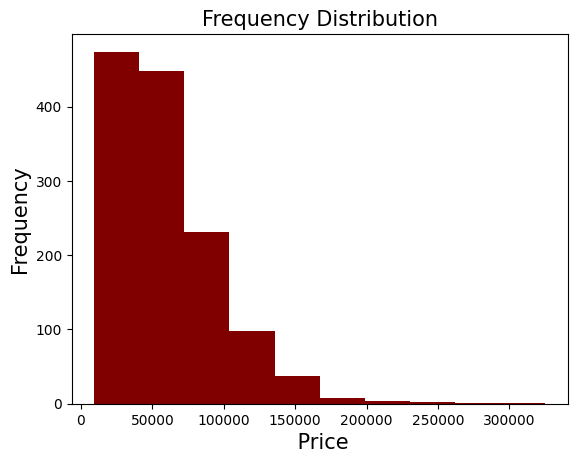

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.xlabel(" Price", fontsize=15)

plt.ylabel("Frequency", fontsize=15)

plt.title("Frequency Distribution", fontsize=15)

plt.hist(laptop["Price"], color = 'maroon')
plt.show()

<ipython-input-16-7639754fd392>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


<Axes: xlabel='Price', ylabel='Density'>

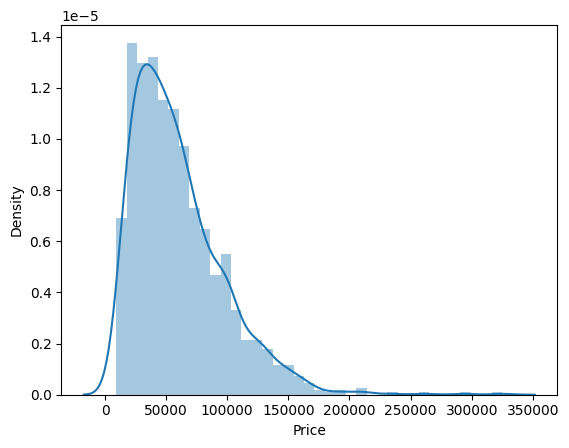

In [ ]:
sns.distplot(laptop['Price'])

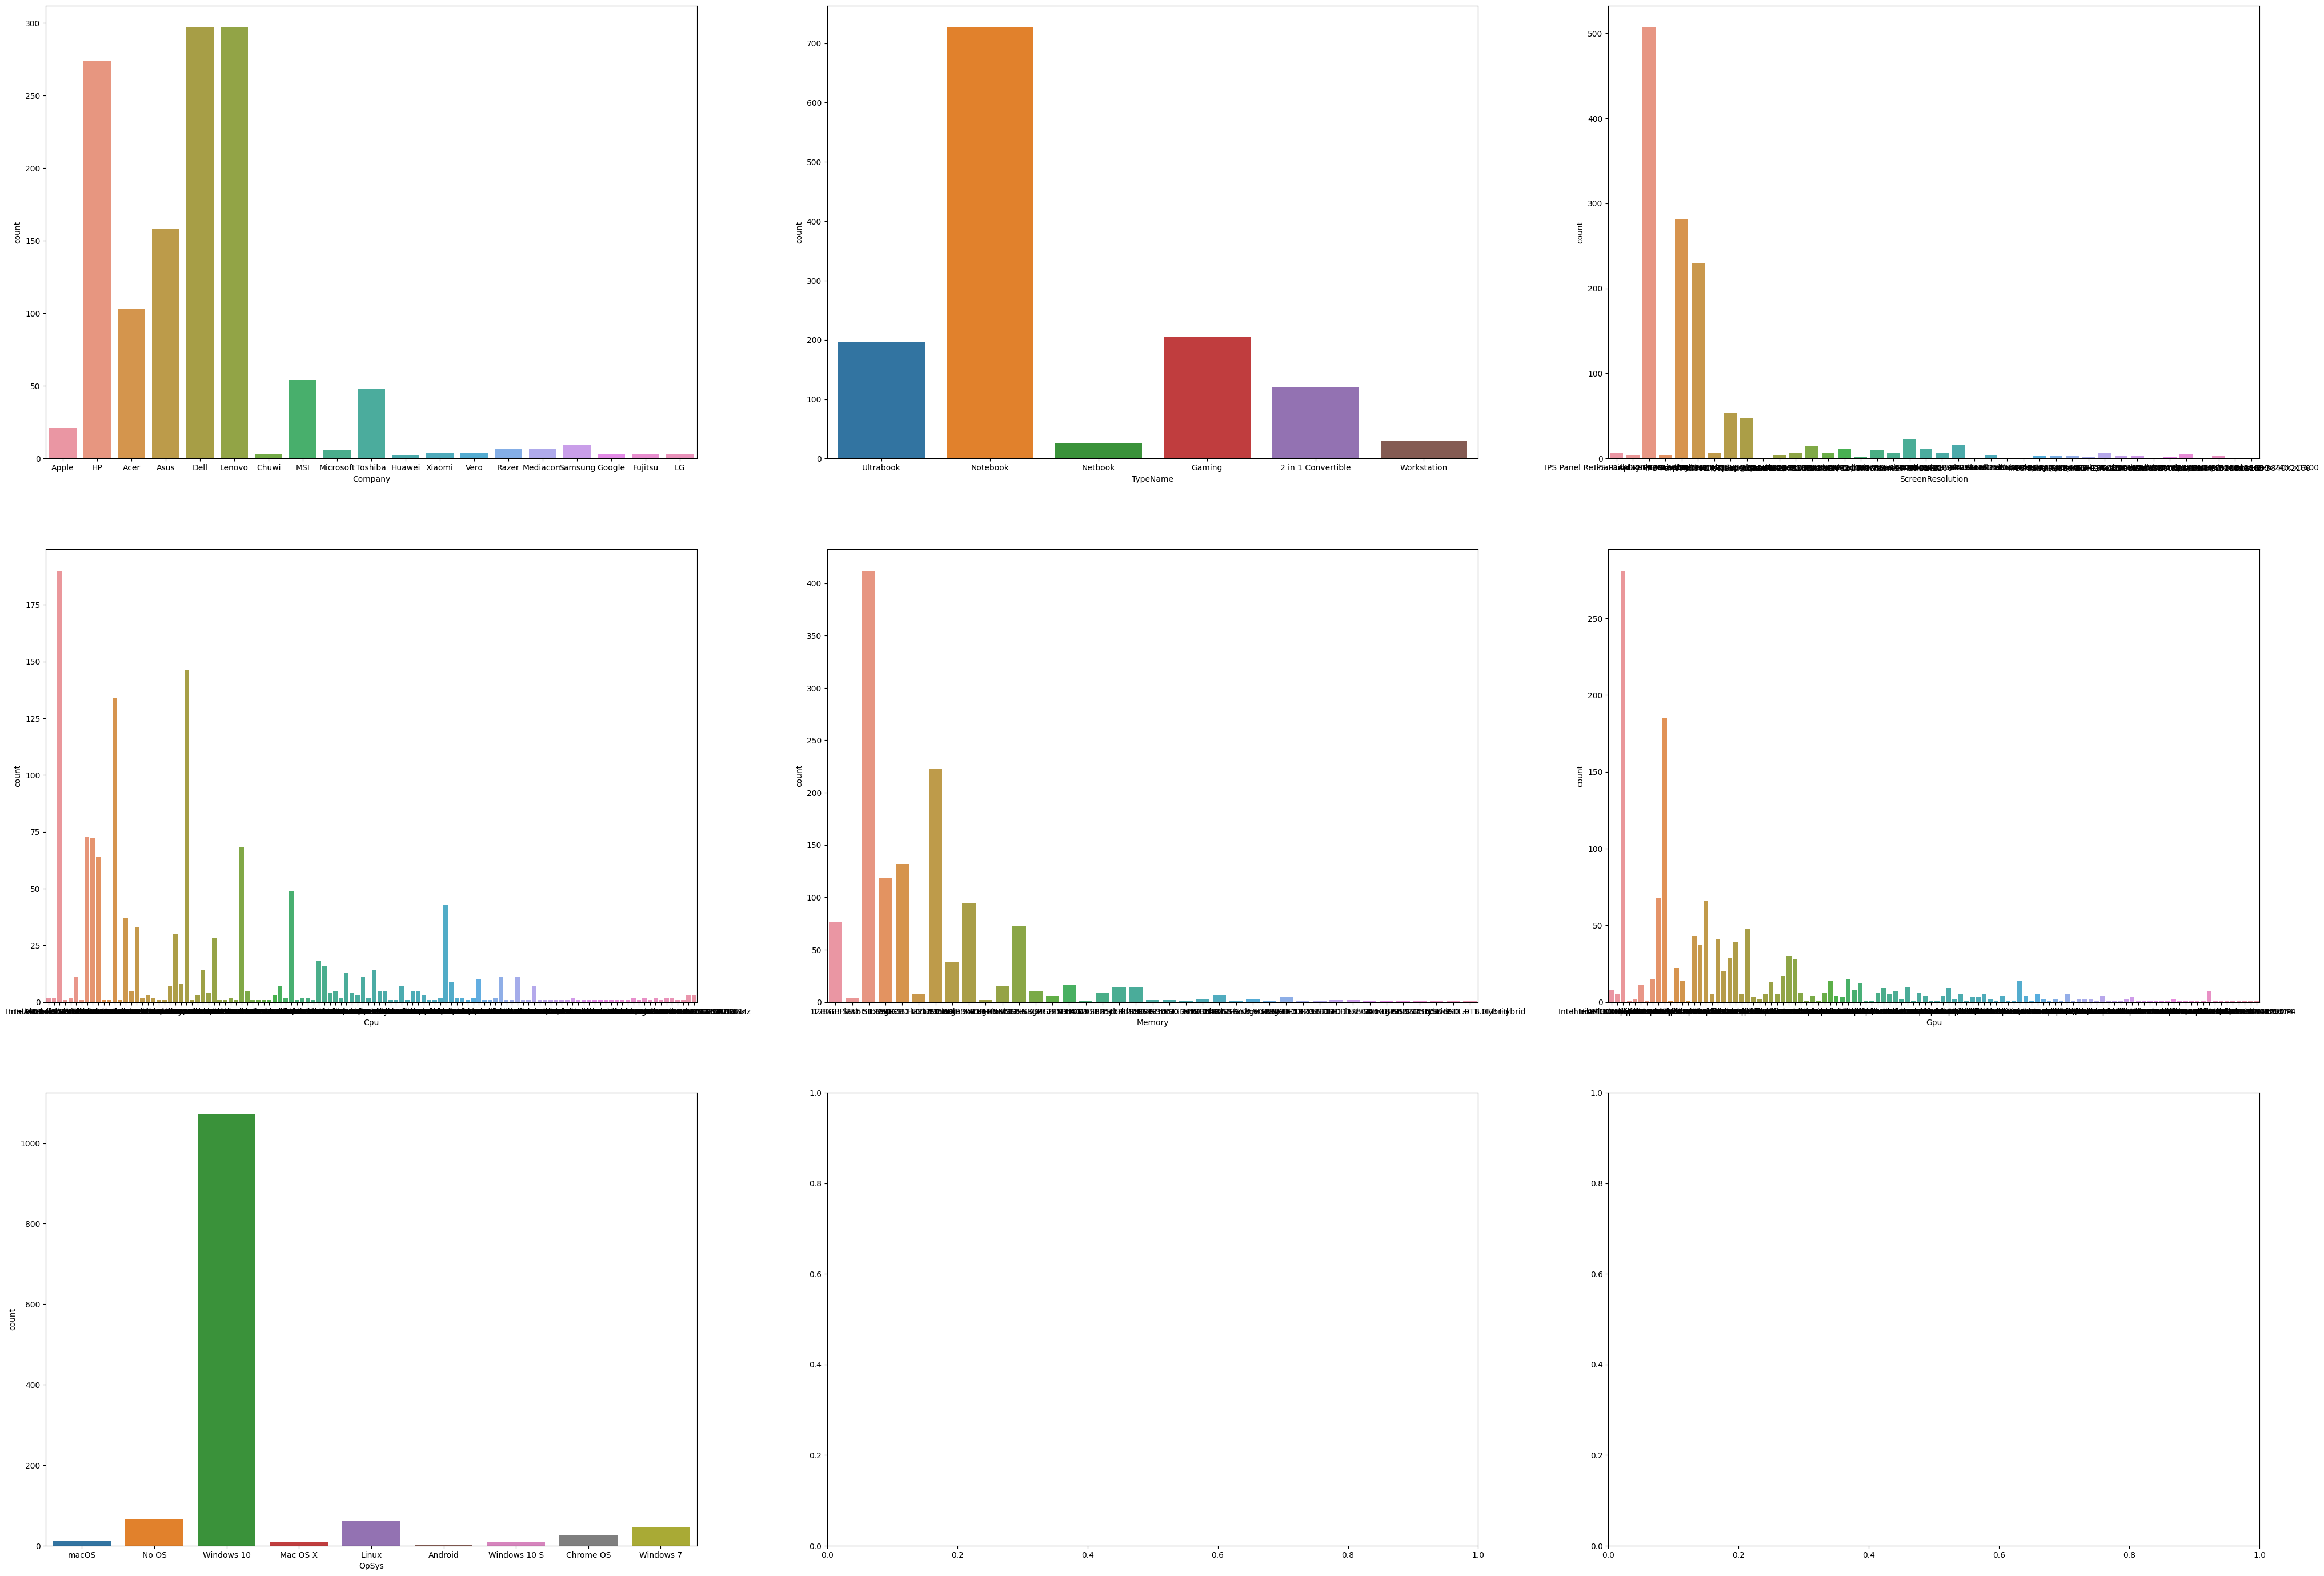

In [ ]:

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


categorical=[]

for column in laptop:

    if is_string_dtype(laptop[column]):

        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=laptop[variable], ax = subplot)

# display the plot
plt.show()

<Axes: >

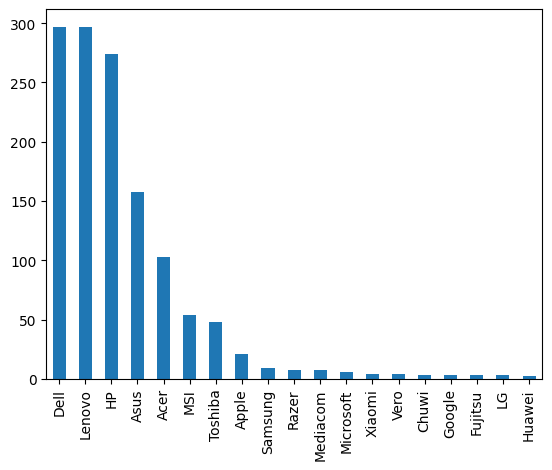

In [ ]:
laptop['Company'].value_counts().plot(kind='bar')

<Axes: >

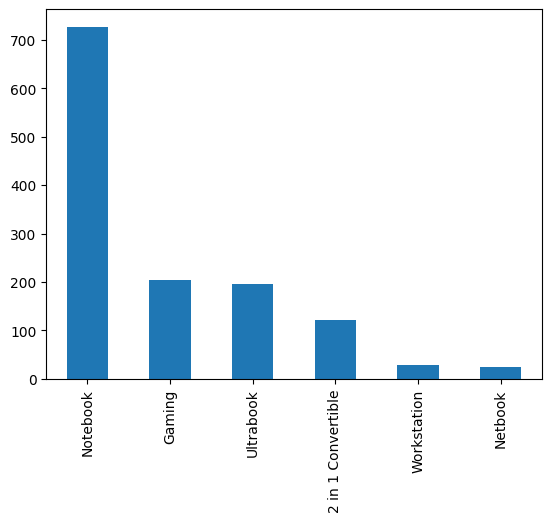

In [ ]:
laptop['TypeName'].value_counts().plot(kind='bar')

<Axes: >

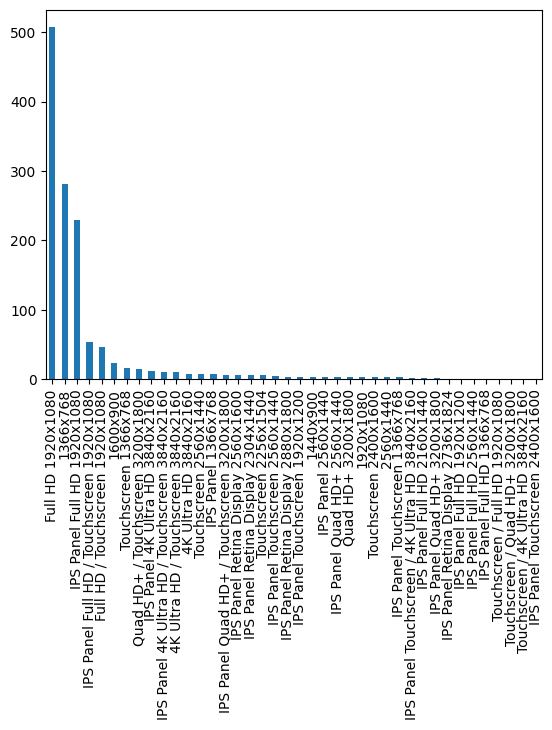

In [ ]:
laptop['ScreenResolution'].value_counts().plot(kind='bar')

<Axes: >

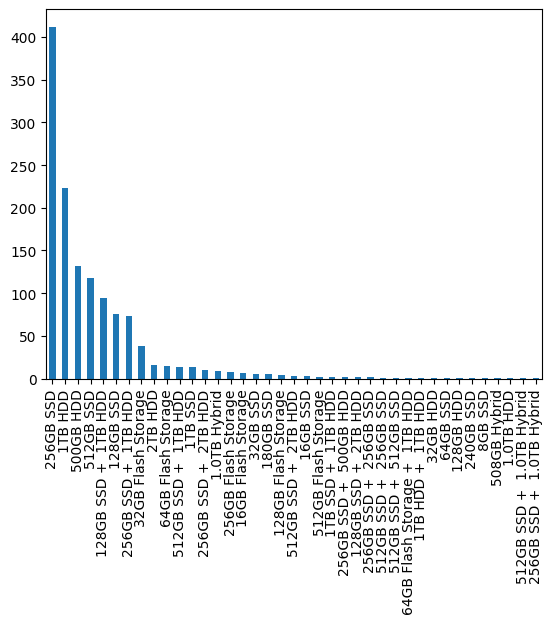

In [ ]:
laptop['Memory'].value_counts().plot(kind='bar')

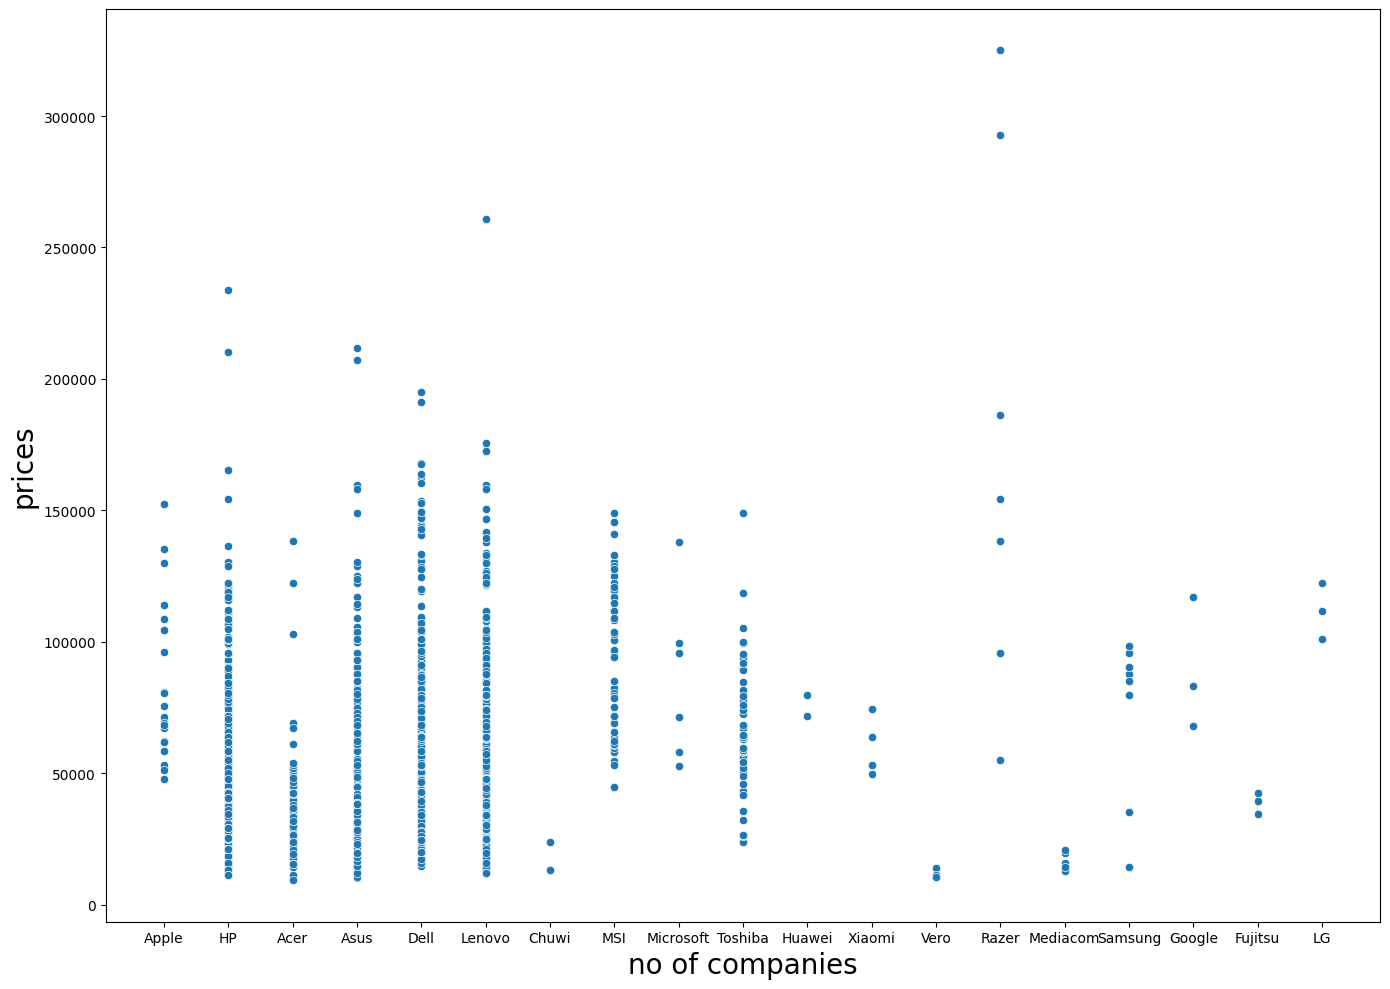

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Company',y='Price',data=laptop)
plt.xlabel('no of companies' , fontsize = 20)
plt.ylabel('prices',fontsize = 20)
plt.tight_layout()
plt.show()

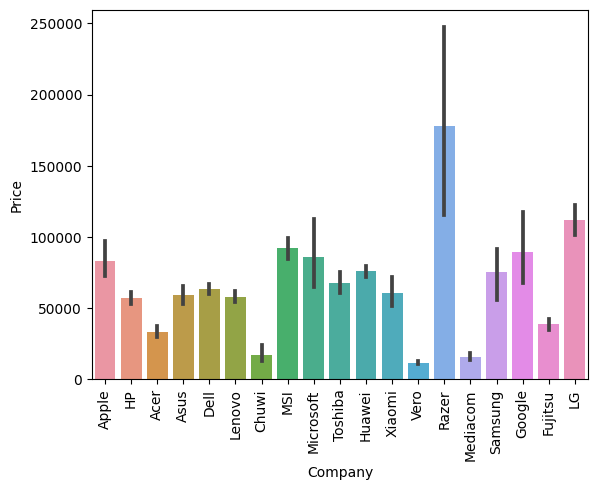

In [ ]:
sns.barplot(x=laptop['Company'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

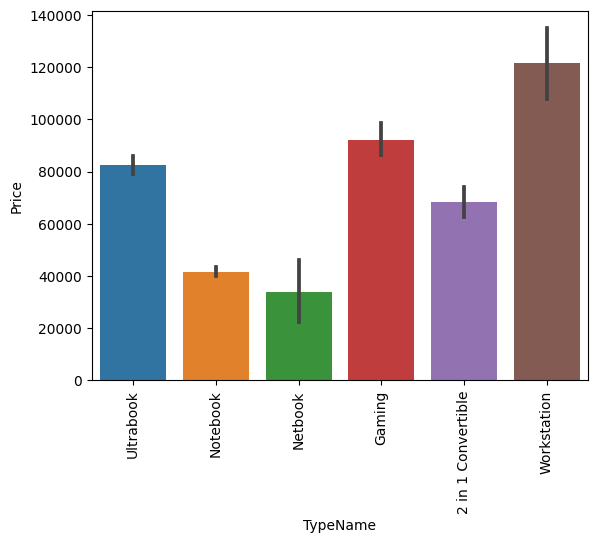

In [ ]:
sns.barplot(x=laptop['TypeName'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

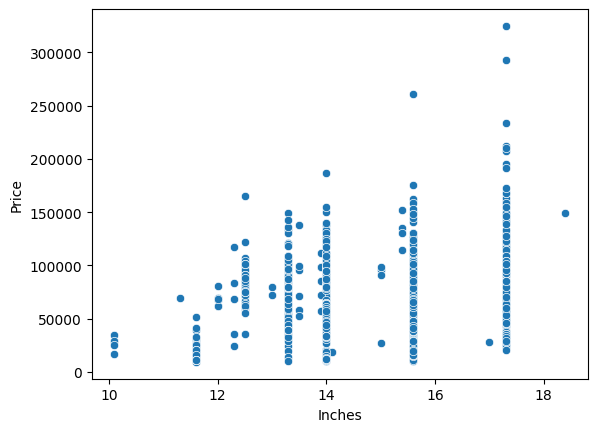

In [ ]:
sns.scatterplot(x=laptop['Inches'],y=laptop['Price'])


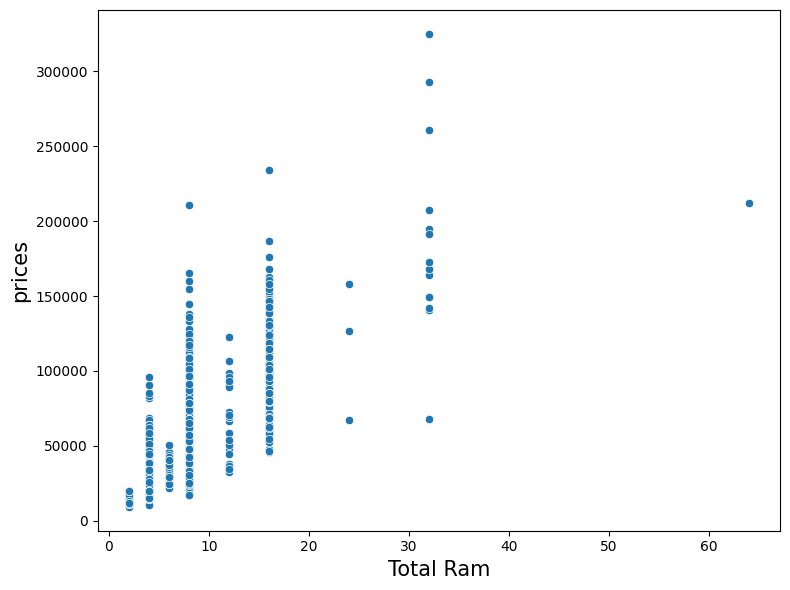

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Ram',y='Price',data=laptop)
plt.xlabel('Total Ram' , fontsize = 15)
plt.ylabel('prices', fontsize = 15)
plt.tight_layout()
plt.show()

<ipython-input-30-a2a5f0ebee31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

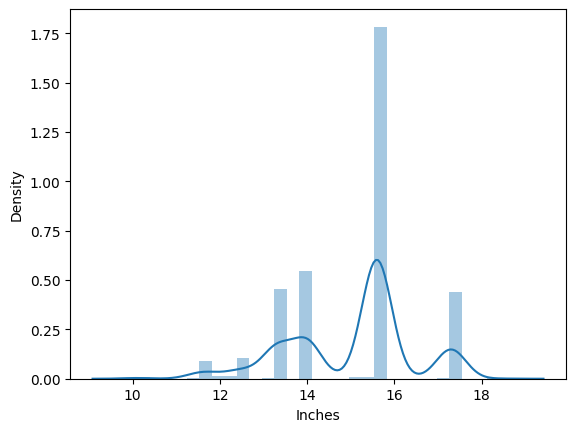

In [ ]:
sns.distplot(laptop['Inches'])


In [ ]:
laptop['ScreenResolution'].value_counts()


Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<Axes: >

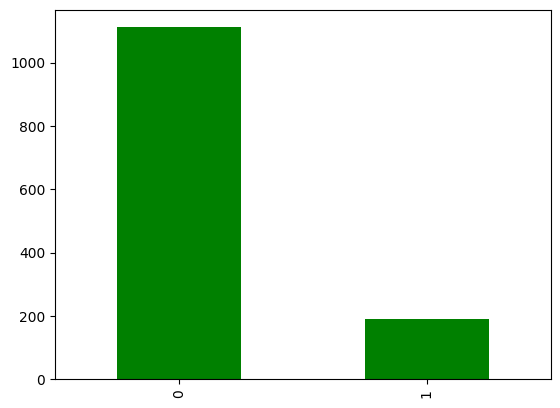

In [ ]:
laptop['Touchscreen'].value_counts().plot(kind='bar',color='green')


<Axes: xlabel='Touchscreen', ylabel='Price'>

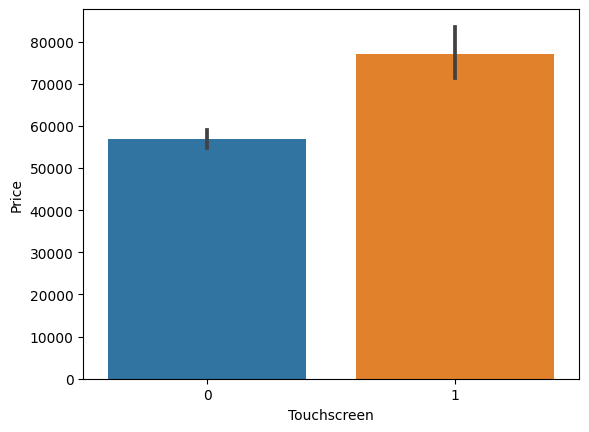

In [ ]:
sns.barplot(x=laptop['Touchscreen'],y=laptop['Price'])


In [ ]:
laptop['Ips'] = laptop['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


<Axes: >

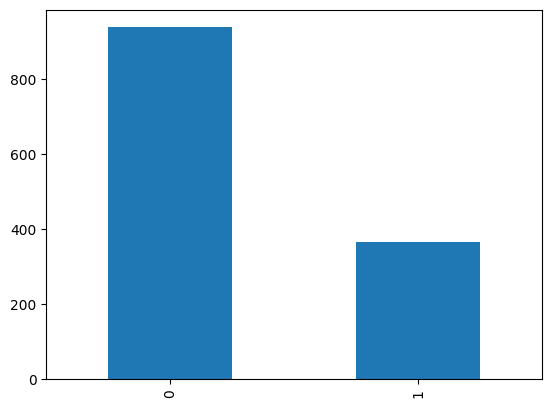

In [ ]:
laptop['Ips'].value_counts().plot(kind='bar')


<Axes: xlabel='Ips', ylabel='Price'>

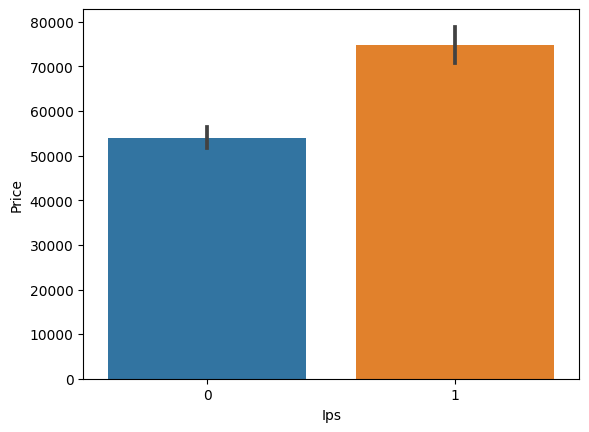

In [ ]:
sns.barplot(x=laptop['Ips'],y=laptop['Price'])


In [ ]:
laptop.corr()['Price']

In [ ]:
laptop['Gpu'].value_counts()


Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
laptop['Gpu brand'] = laptop['Gpu'].apply(lambda x:x.split()[0])


In [ ]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

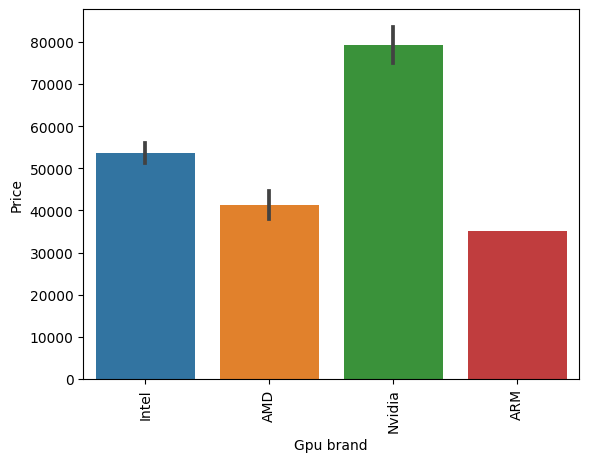

In [ ]:
sns.barplot(x=laptop['Gpu brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
laptop.drop(columns=['Gpu'],inplace=True)


In [ ]:
laptop.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,0,1,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,30636.0000,0,0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,135195.3360,0,1,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,96095.8080,0,1,Intel


In [ ]:
laptop.corr()['Price']


<ipython-input-45-8cd4816bcbd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptop.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
Name: Price, dtype: float64

In [ ]:
laptop['Cpu Name'] = laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
laptop['Cpu brand'] = laptop['Cpu Name'].apply(fetch_processor)

<Axes: >

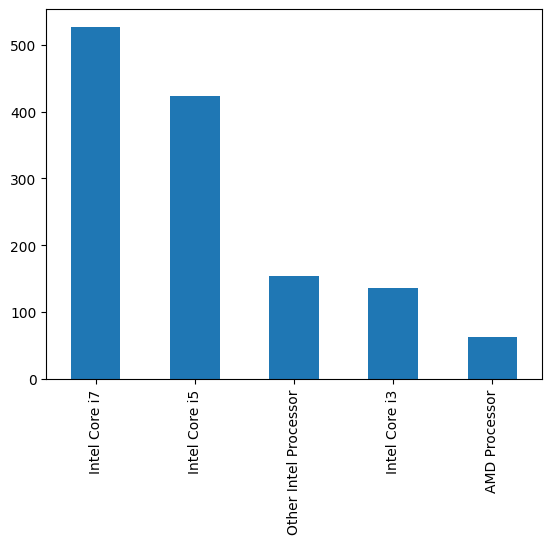

In [ ]:
laptop['Cpu brand'].value_counts().plot(kind='bar')


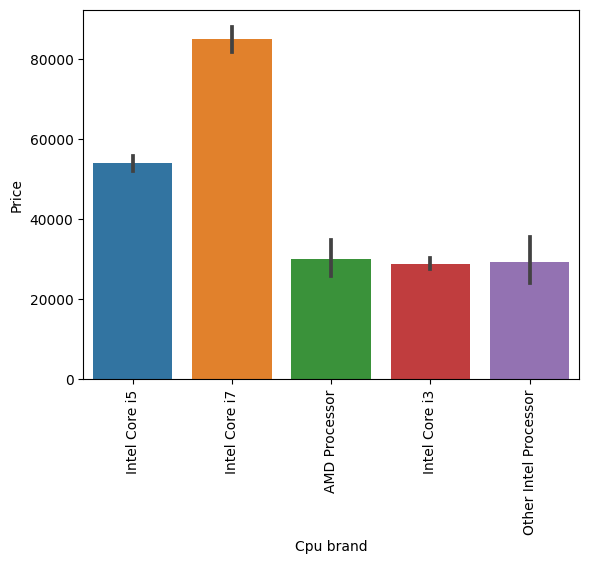

In [ ]:
sns.barplot(x=laptop['Cpu brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
laptop.drop(columns=['Cpu Name'],inplace=True)


In [ ]:
laptop.drop(columns=['ScreenResolution'],inplace=True)


<ipython-input-53-18d3d8a39657>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(laptop.corr(), annot=True, vmax=+1, vmin=-1)


<Axes: >

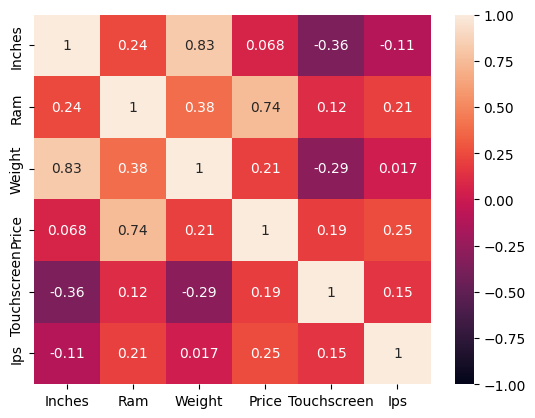

In [ ]:
sns.heatmap(laptop.corr(), annot=True, vmax=+1, vmin=-1)


In [ ]:
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,0,1,Intel,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,Intel,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,30636.0000,0,0,Intel,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,135195.3360,0,1,AMD,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,96095.8080,0,1,Intel,Intel Core i5


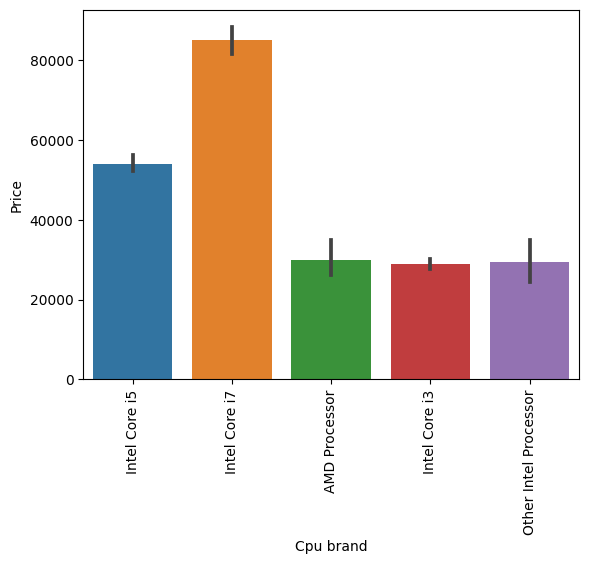

In [ ]:
sns.barplot(x=laptop['Cpu brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new = laptop["Memory"].str.split("+", n = 1, expand = True)

laptop["first"]= new[0]
laptop["first"]=laptop["first"].str.strip()

laptop["second"]= new[1]

laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['first'] = laptop['first'].str.replace(r'\D', '')

laptop["second"].fillna("0", inplace = True)

laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['second'] = laptop['second'].str.replace(r'\D', '')

laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-56-a6e63d179b09>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['first'] = laptop['first'].str.replace(r'\D', '')
<ipython-input-56-a6e63d179b09>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['second'] = laptop['second'].str.replace(r'\D', '')


In [ ]:
laptop.sample(5)


,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
941,Asus,Notebook,17.3,Intel Pentium Quad Core N3710 1.6GHz,4,1000 HDD,Windows 10,2.80,28238.4000,0,0,Nvidia,Other Intel Processor,1000,0,0,0
920,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Windows 10,2.18,36496.2672,0,0,AMD,Intel Core i5,1000,0,0,0
403,Acer,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,8,256 SSD,Linux,2.50,46833.1200,0,0,Nvidia,Intel Core i7,0,256,0,0
183,Toshiba,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,128 SSD,Windows 10,2.00,42251.0400,0,0,Intel,Intel Core i5,0,128,0,0
990,HP,Netbook,12.5,Intel Core M 6Y75 1.2GHz,8,512 SSD,Windows 10,0.97,101658.2400,0,0,Intel,Other Intel Processor,0,512,0,0


In [ ]:
laptop['OpSys'].value_counts()


Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
def cat_os(opt):
    if opt == 'Windows 10' or opt == 'Windows 7' or opt == 'Windows 10 S':
        return 'Windows'
    elif opt == 'macOS' or opt == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
laptop['os'] = laptop['OpSys'].apply(cat_os)


<ipython-input-61-7639754fd392>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


<Axes: xlabel='Price', ylabel='Density'>

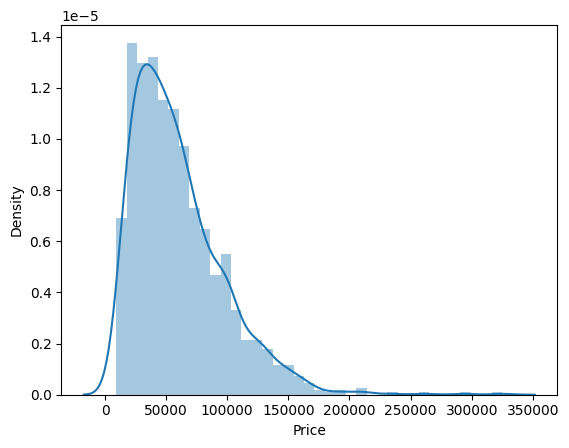

In [ ]:
sns.distplot(laptop['Price'])

<ipython-input-62-e0c69846e014>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price']))


<Axes: xlabel='Price', ylabel='Density'>

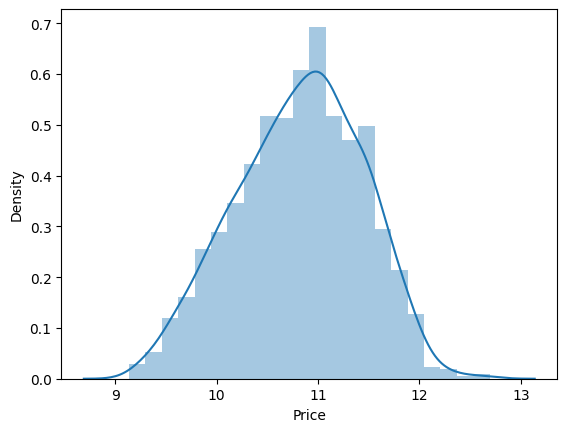

In [ ]:
sns.distplot(np.log(laptop['Price']))


In [ ]:
laptop.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,os
1170,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,8,256 SSD,Windows 10,1.96,36177.12,0,0,Intel,Intel Core i7,0,256,0,0,Windows


In [ ]:
laptop.dtypes

Company           object
TypeName          object
Inches           float64
Cpu               object
Ram                int32
Memory            object
OpSys             object
Weight           float32
Price            float64
Touchscreen        int64
Ips                int64
Gpu brand         object
Cpu brand         object
HDD                int64
SSD                int64
Hybrid             int64
Flash_Storage      int64
os                object
dtype: object

In [ ]:
laptop.drop(columns=['Memory'],inplace=True)

In [ ]:
laptop.drop(columns=['Cpu'],inplace=True)

In [ ]:
laptop['Cpu brand'] = laptop['Cpu brand'].astype('category')
laptop['Cpu brand'] = laptop['Cpu brand'].cat.codes

In [ ]:
laptop['Cpu brand'].value_counts()

3    527
2    423
4    154
1    136
0     63
Name: Cpu brand, dtype: int64

In [ ]:
x = laptop.drop(columns=['Price'])
y = np.log(laptop['Price'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,Ips,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,os
16,Dell,Notebook,15.6,8,Windows 10,2.2,0,0,AMD,3,0,256,0,0,Windows


LINEAR **REGRESSION**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 4, 8, 14])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.727043583829918
MAE 0.2553564548482574


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 4, 8, 14])
], remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8023342029332207
MAE 0.19954576353118164


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 4, 8, 14])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_samples=0.70,
                              max_features=0.60,
                              max_depth=30)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8961836839796044
MAE 0.1562944455227557


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
